In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Defined the url n download file

In [21]:

url =  'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(url, header = None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [23]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [24]:
df.replace('?', np.nan, inplace = True)

# Data Wrangling

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [40]:
# handle the smoker column
isSmoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].replace(np.nan, isSmoker)

#handle the age column
meanAge = df['age'].astype('float').mean(axis = 0)
df['age'] = df['age'].replace(np.nan, meanAge)

#update the data types
df[['age','smoker']] = df[['age','smoker']].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
 7   Smoker          2772 non-null   object 
dtypes: float64(2), int32(2), int64(3), object(1)
memory usage: 151.7+ KB


In [41]:
#round the charges column to 2 decimal places long
df[['charges']] = np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges,Smoker
0,19,1,27.900,0,1,3,16884.92,1
1,18,2,33.770,1,0,4,1725.55,0
2,28,2,33.000,3,0,4,4449.46,0
3,33,2,22.705,0,0,1,21984.47,0
4,32,2,28.880,0,0,1,3866.86,0


# Exploratory Data Analysis

(0.0, 66902.85800000001)

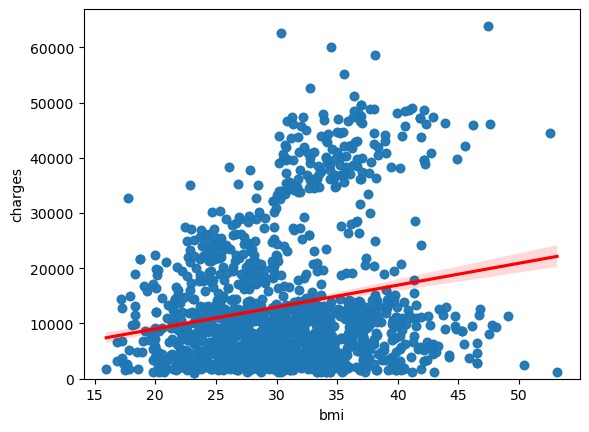

In [48]:
#regression plot for charges to bmi
sns.regplot(x='bmi', y='charges', data = df, line_kws = {'color':'red'})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

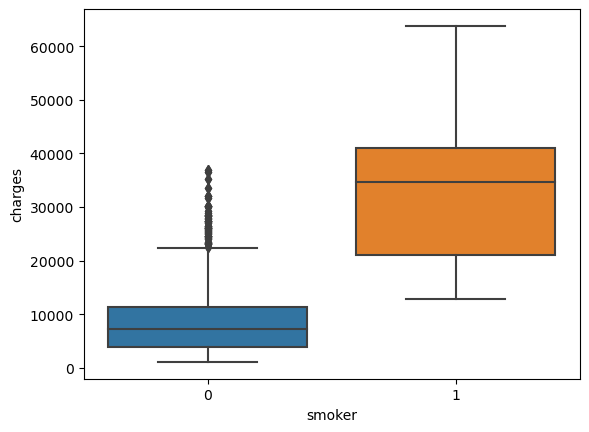

In [50]:
#boxplot charges and smoker
sns.boxplot(x = 'smoker', y = 'charges', data = df)

In [51]:
df.corr()

C:\Users\bryll\AppData\Local\Temp\ipykernel_19068\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# Model Development

In [52]:
#univariate
xdata = df[['smoker']]
ydata = df[['charges']]

lm = LinearRegression()

lm.fit(xdata, ydata)

lm.score(xdata, ydata)

0.6221791733924185

In [54]:
#multivariate
zdata = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(zdata,ydata)
lm.score(zdata, ydata)

0.7504083820289634

In [55]:
#using the pipelines for scaling, polynomial n linear regression

#create the model
inputs = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(inputs)
zdata = zdata.astype('float')
pipe.fit(zdata, ydata)

#test search for its r2 score
ypipe = pipe.predict(zdata)
r2_score(ydata, ypipe)

0.8452541689899032

# Model Refinement

In [58]:
#split to 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(zdata, ydata, test_size = 0.2, random_state = 1)


In [59]:
# initialize a ridge regressor using hyperparameter a = 0.1

rm = Ridge(alpha = 0.1)
rm.fit(xtrain, ytrain)

yhat = rm.predict(xtest)
r2_score(ytest, yhat)

0.6760807731582403

In [60]:
# apply polynomial transformation to the training paramters with degree = 2
pr = PolynomialFeatures (degree = 2)

xtrainpr = pr.fit_transform(xtrain)
xtestpr = pr.fit_transform(xtest)

rm.fit(xtrainpr, ytrain)

yhat = rm.predict(xtestpr)
r2_score(ytest, yhat)

0.7835631107608159